<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

# Specify the file path
file_path = "dataset.csv"

# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_path)

# Assuming you already have a Pandas data frame named 'df'

# Additional details:
# - The `df.isnull()` function returns a Boolean data frame where each cell is True if it contains a missing value (NaN), and False otherwise.
# - The `df.columns` attribute returns the column labels of the data frame.
# - The `.any()` method returns a Boolean Series indicating whether any value in the given axis (in this case, columns) is True.
# - Finally, the `.columns` attribute is used to retrieve the column labels where the condition is True.

# You can now use the 'columns_with_missing_values' variable to further analyze or handle the columns with missing values.

<ipython-input-4-992aa02f4c09>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


Запрос к чату GPT, => получили код внизу

Write a Python code to perform the following actions.
1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

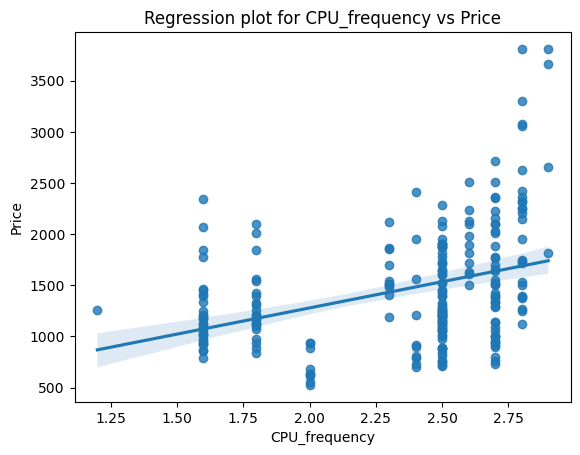

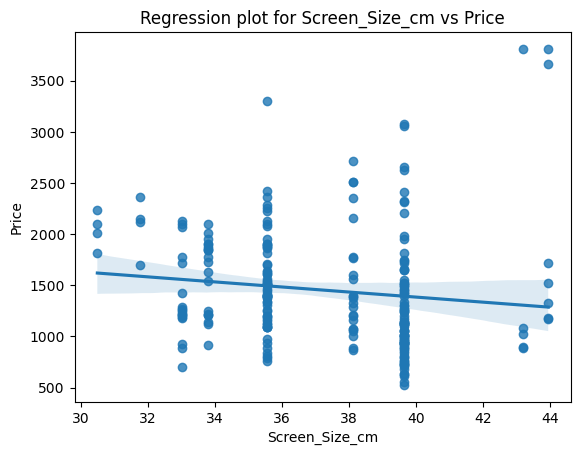

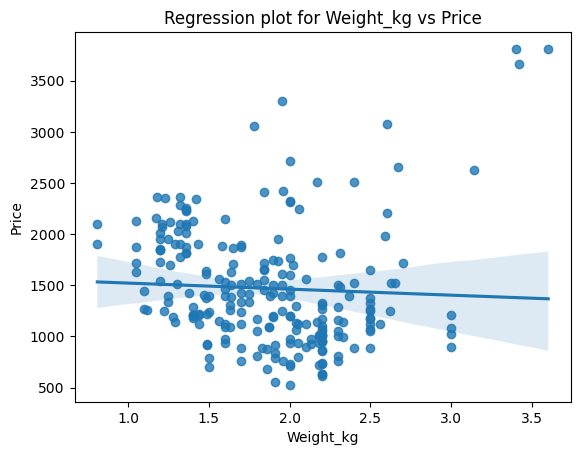

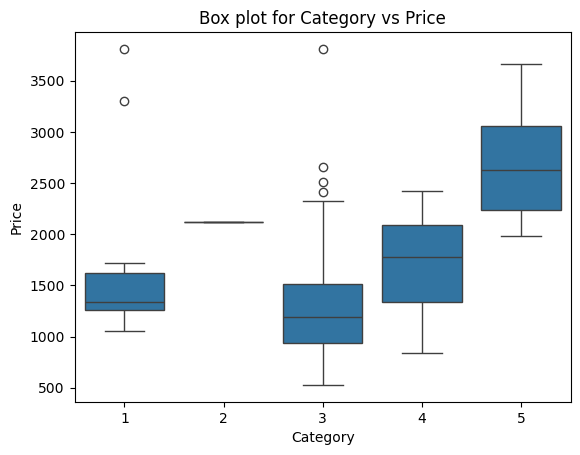

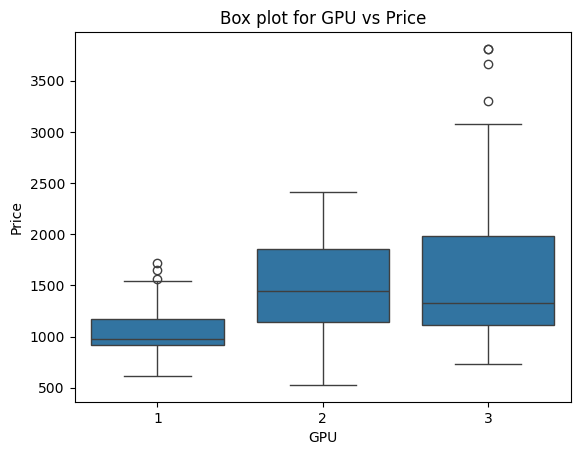

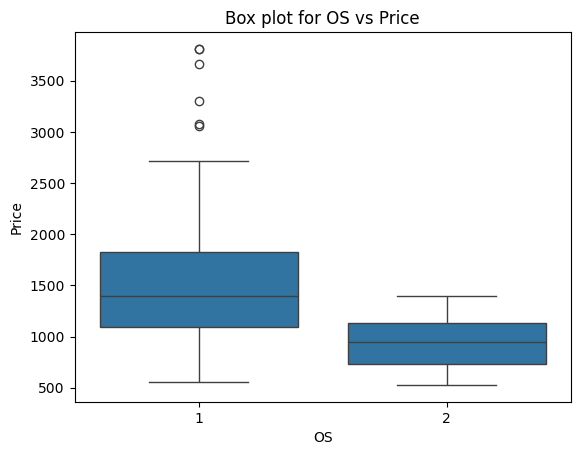

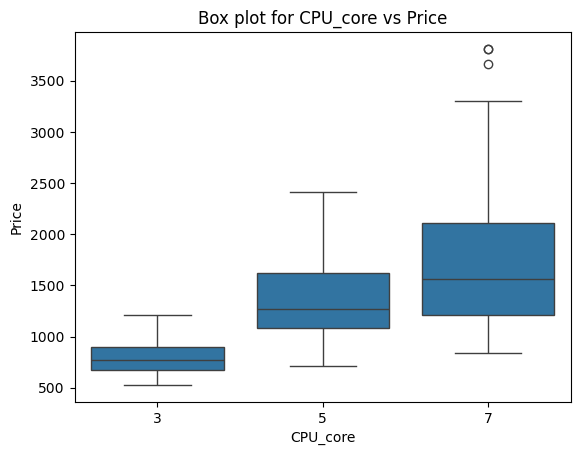

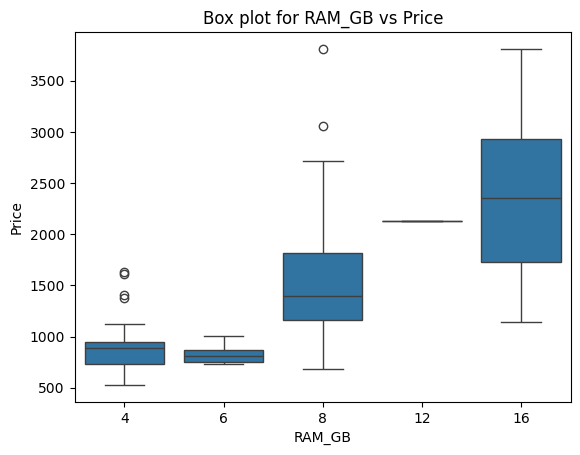

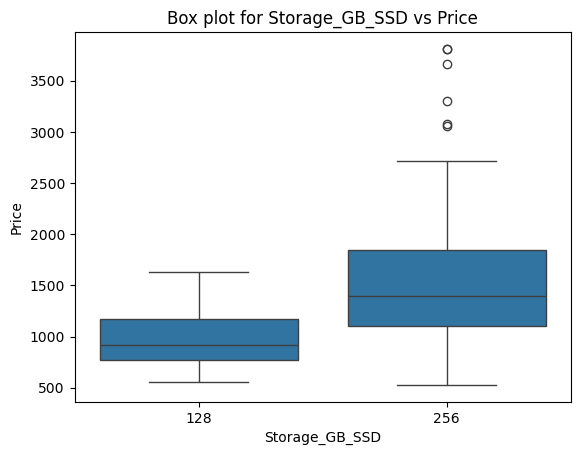

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create regression plots
data = pd.read_csv('dataset.csv')

regression_attributes = ['CPU_frequency', 'Screen_Size_cm', 'Weight_kg']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Assuming your dataframe has a target attribute 'Price'
df = pd.read_csv('dataset.csv')

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

<class 'ValueError'>: array must not contain infs or NaNs

In [30]:

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

In [31]:
columns_with_missing_values

Index(['Screen_Size_cm', 'Weight_kg'], dtype='object')

In [32]:
import pandas as pd

# Assuming you already have a Pandas data frame named 'df'

# Replace missing values in the 'Screen_Size_cm' column with the most frequent value
most_frequent_value = df['Screen_Size_cm'].mode()[0]
df['Screen_Size_cm'].fillna(most_frequent_value, inplace=True)

# Replace missing values in the 'Weight_kg' column with the mean value
mean_value = df['Weight_kg'].mean()
df['Weight_kg'].fillna(mean_value, inplace=True)

# Additional details:
# - The `.mode()` method is used to calculate the most frequent value in a column.
# - The `[0]` indexing is used to retrieve the most frequent value from the resulting Series.
# - The `.fillna()` method is used to replace missing values with a specified value.
# - The `inplace=True` parameter is used to modify the original data frame instead of creating a new one.

# You can now use the modified 'df' data frame, which has the missing values replaced according to the guidelines.

<ipython-input-32-d24d76bd4fa0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(most_frequent_value, inplace=True)
<ipython-input-32-d24d76bd4fa0>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [33]:

# Assuming you already have a Pandas data frame named 'df'

# Change the data type of 'Screen_Size_cm' and 'Weight_kg' to float
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
df['Weight_kg'] = df['Weight_kg'].astype(float)

# Additional details:
# - The `.astype()` method is used to change the data type of a column.
# - In this case, we're specifying `float` as the desired data type.
# - Make sure the columns contain numeric values that can be converted to float.
# - If there are any non-numeric values in the columns, the conversion will raise an error.

# You can now use the modified 'df' data frame, which has the data types of 'Screen_Size_cm' and 'Weight_kg' changed to float.

In [34]:
# Convert 'Screen_Size_cm' from centimeters to inches and modify the attribute name
df['Screen_Size_inch'] = df['Screen_Size_cm'] * 0.393701
df.drop('Screen_Size_cm', axis=1, inplace=True)
# Convert 'Weight_kg' from kilograms to pounds and modify the attribute name
df['Weight_pounds'] = df['Weight_kg'] * 2.20462
df.drop('Weight_kg', axis=1, inplace=True)
# Additional details:
# - The code multiplies the values under 'Screen_Size_cm' by 0.393701 to convert centimeters to inches.
# - The resulting values are stored in a new attribute named 'Screen_Size_inch'.
# - The original 'Screen_Size_cm' attribute is dropped from the data frame using the `.drop()` method.
# - Similarly, the code multiplies the values under 'Weight_kg' by 2.20462 to convert kilograms to pounds.
# - The resulting values are stored in a new attribute named 'Weight_pounds'.
# - The original 'Weight_kg' attribute is dropped from the data frame.
# You can now use the modified 'df' data frame, which has the contents and attribute names modified as required.

In [35]:

# Normalize the content under 'CPU_frequency' with respect to its maximum value
max_value = df['CPU_frequency'].max()
df['CPU_frequency'] = df['CPU_frequency'] / max_value

# Additional details:
# - The code calculates the maximum value of the 'CPU_frequency' attribute using the `.max()` method.
# - It then divides the values under 'CPU_frequency' by the maximum value to normalize them.
# - The resulting normalized values overwrite the original values in the 'CPU_frequency' attribute.

# You can now use the modified 'df' data frame, which has the content under the 'CPU_frequency' attribute normalized.

In [36]:

# Convert the 'Screen' attribute into indicator variables
df1 = pd.get_dummies(df['Screen'], prefix='Screen')

# Append df1 into the original data frame df
df = pd.concat([df, df1], axis=1)

# Drop the original 'Screen' attribute from the data frame
df.drop('Screen', axis=1, inplace=True)

# Additional details:
# - The `pd.get_dummies()` function is used to convert a categorical attribute into indicator variables.
# - The resulting indicator variables are stored in a new data frame named 'df1'.
# - The `prefix` parameter is used to specify the naming convention for the indicator variables.
# - The `pd.concat()` function is used to concatenate the original data frame 'df' and 'df1' along the column axis (axis=1).
# - The resulting concatenated data frame is assigned back to 'df'.
# - Finally, the `.drop()` method is used to drop the original 'Screen' attribute from 'df'.

# You can now use the modified 'df' data frame, which has the 'Screen' attribute converted into indicator variables, appended, and the original attribute dropped.

In [37]:
# Convert 'Price' from USD to Euros
df['Price_EUR'] = df['Price'] * 0.85  # Assuming 1 USD = 0.85 EUR

# Print the original DataFrame
print("Original DataFrame:")
print(df)

# Print the converted DataFrame
print("\nDataFrame with Price in Euros:")
print(df)

Original DataFrame:
     Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0             0         Acer         4    2   1         5       0.551724   
1             1         Dell         3    1   1         3       0.689655   
2             2         Dell         3    1   1         7       0.931034   
3             3         Dell         4    2   1         5       0.551724   
4             4           HP         4    2   1         7       0.620690   
..          ...          ...       ...  ...  ..       ...            ...   
233         233       Lenovo         4    2   1         7       0.896552   
234         234      Toshiba         3    2   1         5       0.827586   
235         235       Lenovo         4    2   1         5       0.896552   
236         236       Lenovo         3    3   1         5       0.862069   
237         237      Toshiba         3    2   1         5       0.793103   

     RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  Weight_pounds

In [38]:
# Normalize the 'CPU_frequency' column
df['CPU_frequency'] = (df['CPU_frequency'] - df['CPU_frequency'].min()) / (df['CPU_frequency'].max() - df['CPU_frequency'].min())

# Print the original DataFrame
print("Original DataFrame:")
print(df)

# Print the normalized DataFrame
print("\nNormalized DataFrame:")
print(df)

Original DataFrame:
     Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0             0         Acer         4    2   1         5       0.235294   
1             1         Dell         3    1   1         3       0.470588   
2             2         Dell         3    1   1         7       0.882353   
3             3         Dell         4    2   1         5       0.235294   
4             4           HP         4    2   1         7       0.352941   
..          ...          ...       ...  ...  ..       ...            ...   
233         233       Lenovo         4    2   1         7       0.823529   
234         234      Toshiba         3    2   1         5       0.705882   
235         235       Lenovo         4    2   1         5       0.823529   
236         236       Lenovo         3    3   1         5       0.764706   
237         237      Toshiba         3    2   1         5       0.647059   

     RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  Weight_pounds

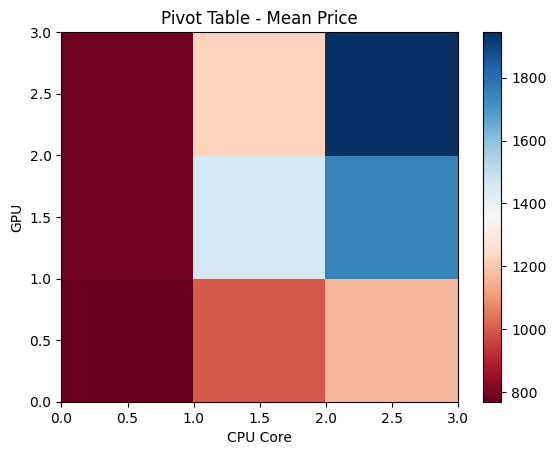

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set as a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
